# Data Processing

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Import data 

In [3]:
df = pd.read_csv("Dataset/email_spam_dataset.csv")

In [4]:
df.shape

(33715, 2)

In [6]:
df.head(10)

,Text,Label
0,Subject: christmas tree farm pictures\n,ham
1,"Subject: vastar resources , inc .\ngary , prod...",ham
2,Subject: calpine daily gas nomination\n- calpi...,ham
3,Subject: re : issue\nfyi - see note below - al...,ham
4,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham
5,"Subject: mcmullen gas for 11 / 99\njackie ,\ns...",ham
6,"Subject: meter 1517 - jan 1999\ngeorge ,\ni ne...",ham
7,Subject: duns number changes\nfyi\n- - - - - -...,ham
8,Subject: king ranch\nthere are two fields of g...,ham
9,Subject: re : entex transistion\nthanks so muc...,ham


In [8]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

#### First we process a sample of data

In [41]:
sample = df.sample(100)

In [42]:
sample.head(10)

,Text,Label
13230,Subject: start date : 1 / 14 / 02 ; hourahead ...,ham
15763,Subject: meningitis outbreak & on - site vacci...,ham
31721,Subject: the next move higher for strong marke...,spam
31575,"Subject: what ' s up , then ?\nand a very good...",spam
21491,Subject: xaeyalpw savings are here\nhannaman h...,spam
25213,Subject: a superb experience for shopper of qu...,spam
3649,Subject: fw :\nlisted below are some guideline...,ham
26070,Subject: lose 28 pounds in 10 days 30201\nlong...,spam
13003,Subject: start date : 12 / 28 / 01 ; hourahead...,ham
33569,Subject: online pharmacy - buy drugs online\nr...,spam


In [43]:
first_text = sample.iloc[1, 0]

In [44]:
first_text

"Subject: meningitis outbreak & on - site vaccinations\nthe enron health center has remained in contact with our occupational\nmedicine advisor and the houston public health dept . regarding the meningitis\noutbreak and recommendations for vaccinations . at this time , the houston\npublic health department does not consider the present cases of meningitis\nas an epidemic . ? they have provided us with the following guidelines based on\ninput from the centers for disease control ( cdc ) .\n?\nthe cdc has defined the highest risk groups as the following :\n1 . children less than 2 years of age\n2 . groups of individuals living in confined spaces , i . e . college dorms and\nmilitary recruits\n3 . individuals that are immunocompromised\n4 . individuals with a damaged spleen or no spleen\n5 . travellers to sub saharan africa or the middle east\n6 . close contact with infected individuals through sneezing , coughing , or\nsaliva exchange .\n?\nthe cdc has described an outbreak as 10 cases p

#### 1. Replace `\n` with whitespace

In [45]:
sample['Text'] =  sample['Text'].str.replace('\n', ' ', regex=True)

In [46]:
sample.iloc[1, 0]

"Subject: meningitis outbreak & on - site vaccinations the enron health center has remained in contact with our occupational medicine advisor and the houston public health dept . regarding the meningitis outbreak and recommendations for vaccinations . at this time , the houston public health department does not consider the present cases of meningitis as an epidemic . ? they have provided us with the following guidelines based on input from the centers for disease control ( cdc ) . ? the cdc has defined the highest risk groups as the following : 1 . children less than 2 years of age 2 . groups of individuals living in confined spaces , i . e . college dorms and military recruits 3 . individuals that are immunocompromised 4 . individuals with a damaged spleen or no spleen 5 . travellers to sub saharan africa or the middle east 6 . close contact with infected individuals through sneezing , coughing , or saliva exchange . ? the cdc has described an outbreak as 10 cases per 100 , 000 popul

#### 2. Remove "Subject:" from the beginning of the text

In [47]:
sample['Text'] = sample['Text'].str.replace(r'^Subject:\s*', '', regex=True)

In [48]:
sample.iloc[1, 0]

"meningitis outbreak & on - site vaccinations the enron health center has remained in contact with our occupational medicine advisor and the houston public health dept . regarding the meningitis outbreak and recommendations for vaccinations . at this time , the houston public health department does not consider the present cases of meningitis as an epidemic . ? they have provided us with the following guidelines based on input from the centers for disease control ( cdc ) . ? the cdc has defined the highest risk groups as the following : 1 . children less than 2 years of age 2 . groups of individuals living in confined spaces , i . e . college dorms and military recruits 3 . individuals that are immunocompromised 4 . individuals with a damaged spleen or no spleen 5 . travellers to sub saharan africa or the middle east 6 . close contact with infected individuals through sneezing , coughing , or saliva exchange . ? the cdc has described an outbreak as 10 cases per 100 , 000 population dur

#### 3. Remove special characters.

In [51]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [52]:
sample['Text'] = sample['Text'].apply(remove_special_characters)

In [53]:
sample.iloc[1, 0]

'meningitis outbreak  on  site vaccinations the enron health center has remained in contact with our occupational medicine advisor and the houston public health dept  regarding the meningitis outbreak and recommendations for vaccinations  at this time  the houston public health department does not consider the present cases of meningitis as an epidemic   they have provided us with the following guidelines based on input from the centers for disease control  cdc    the cdc has defined the highest risk groups as the following    children less than  years of age   groups of individuals living in confined spaces  i  e  college dorms and military recruits   individuals that are immunocompromised   individuals with a damaged spleen or no spleen   travellers to sub saharan africa or the middle east   close contact with infected individuals through sneezing  coughing  or saliva exchange   the cdc has described an outbreak as  cases per    population during a period of  months   they recommend 

#### 4. Remove Unnecessary Whitespaces

In [54]:
sample['Text'] = sample['Text'].str.replace(r'\s+', ' ', regex=True)

In [56]:
sample.iloc[2, 0]

'the next move higher for strong market leader energy teiecom inc otc eytl offering the worid s first hands freee two way inteliigent miniaturized wireless personal telecommunication eyeware systems source news december oo current price o adds advisors formeriy with motoroia nyse mot and harris corp nyse hrs read beiow is eytl an undiscovered gem that is positioned to go higher piease review exactiy what this company does does it sound new and exciting to you watch this one trade reasons to consider eytl source recent press reieases energy telecom announces the appointment of henry l pujol as advisor previousiy served as vice president and director of integrated eiectrics system sector a division of motorola mr pujo aiso served as vice president of linkworks and was vice president of the paging products group at motoroia as weil as the manager of research and engineering at martin marietta energy telecom announces appointment of herbert r perkins to advisory board was vice president of

#### 5. Normalize Case

In [57]:
sample['Text'] = sample['Text'].str.lower()

In [58]:
sample.iloc[1, 0]

'meningitis outbreak on site vaccinations the enron health center has remained in contact with our occupational medicine advisor and the houston public health dept regarding the meningitis outbreak and recommendations for vaccinations at this time the houston public health department does not consider the present cases of meningitis as an epidemic they have provided us with the following guidelines based on input from the centers for disease control cdc the cdc has defined the highest risk groups as the following children less than years of age groups of individuals living in confined spaces i e college dorms and military recruits individuals that are immunocompromised individuals with a damaged spleen or no spleen travellers to sub saharan africa or the middle east close contact with infected individuals through sneezing coughing or saliva exchange the cdc has described an outbreak as cases per population during a period of months they recommend vaccinating high risk individuals livin

## Tokenization

In [64]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/abbask1552/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#### 6. Tokenize the text

In [132]:
sample['Tokens'] = sample['Text'].apply(word_tokenize)

In [133]:
sample.head()

,Text,Label,Tokens
13230,start date hourahead hour start date hourahead...,ham,"[start, date, hourahead, hour, start, date, ho..."
15763,meningitis outbreak on site vaccinations the e...,ham,"[meningitis, outbreak, on, site, vaccinations,..."
31721,the next move higher for strong market leader ...,spam,"[the, next, move, higher, for, strong, market,..."
31575,what s up then and a very good morning to you ...,spam,"[what, s, up, then, and, a, very, good, mornin..."
21491,xaeyalpw savings are here hannaman hierarcy hq...,spam,"[xaeyalpw, savings, are, here, hannaman, hiera..."


In [134]:
sample.iloc[1, 2]

['meningitis',
 'outbreak',
 'on',
 'site',
 'vaccinations',
 'the',
 'enron',
 'health',
 'center',
 'has',
 'remained',
 'in',
 'contact',
 'with',
 'our',
 'occupational',
 'medicine',
 'advisor',
 'and',
 'the',
 'houston',
 'public',
 'health',
 'dept',
 'regarding',
 'the',
 'meningitis',
 'outbreak',
 'and',
 'recommendations',
 'for',
 'vaccinations',
 'at',
 'this',
 'time',
 'the',
 'houston',
 'public',
 'health',
 'department',
 'does',
 'not',
 'consider',
 'the',
 'present',
 'cases',
 'of',
 'meningitis',
 'as',
 'an',
 'epidemic',
 'they',
 'have',
 'provided',
 'us',
 'with',
 'the',
 'following',
 'guidelines',
 'based',
 'on',
 'input',
 'from',
 'the',
 'centers',
 'for',
 'disease',
 'control',
 'cdc',
 'the',
 'cdc',
 'has',
 'defined',
 'the',
 'highest',
 'risk',
 'groups',
 'as',
 'the',
 'following',
 'children',
 'less',
 'than',
 'years',
 'of',
 'age',
 'groups',
 'of',
 'individuals',
 'living',
 'in',
 'confined',
 'spaces',
 'i',
 'e',
 'college',
 'dorm

In [135]:
len(sample.iloc[1,2])

307

#### 7. Stopword Removal <br>
Remove commonly used words that don’t contribute to meaning (e.g., "the," "and," "is").

In [136]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abbask1552/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
stop_words = set(stopwords.words('english'))

In [138]:
print(stop_words, end=' ')

{"should've", 'd', 'down', "it's", 'between', 'the', 'now', 'has', "couldn't", "wouldn't", 'those', 'couldn', 'off', 'as', 'again', 'himself', 'wasn', 'their', 'in', "shan't", 'ours', "you'll", 'am', 'each', 'of', "you're", 'above', 't', 'yourself', 'hasn', "isn't", 'such', 'during', "haven't", 'doesn', 'theirs', 'just', 'an', 'what', 'more', 'then', 'why', 'you', 'before', 'ain', 'when', 'few', 'at', 's', "don't", "that'll", 'm', 'a', 'until', 'some', 'them', 'is', 'for', 'other', 'once', 'me', 'themselves', "hadn't", 'will', 'doing', 'did', 'his', 'whom', 'have', 'only', 'yours', 'no', 'haven', 'because', 'weren', 'where', 'won', "you'd", 'its', 'don', 'do', 'too', 'by', 'there', 'shouldn', 'they', 'into', 'here', 'y', 'own', 'we', 'most', 'or', 'll', 'needn', 'on', 'my', 'mightn', "won't", 'herself', 'are', 'ourselves', 're', "needn't", 'be', 'than', 'should', 'mustn', 've', 'which', 'who', 'these', 'our', "you've", 'didn', 'yourselves', 'ma', 'up', 'him', 'does', 'hadn', 'he', 'not

In [139]:
sample['Tokens'] = sample['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [140]:
len(sample.iloc[1,2])

181

In [141]:
sample.iloc[1,2]

['meningitis',
 'outbreak',
 'site',
 'vaccinations',
 'enron',
 'health',
 'center',
 'remained',
 'contact',
 'occupational',
 'medicine',
 'advisor',
 'houston',
 'public',
 'health',
 'dept',
 'regarding',
 'meningitis',
 'outbreak',
 'recommendations',
 'vaccinations',
 'time',
 'houston',
 'public',
 'health',
 'department',
 'consider',
 'present',
 'cases',
 'meningitis',
 'epidemic',
 'provided',
 'us',
 'following',
 'guidelines',
 'based',
 'input',
 'centers',
 'disease',
 'control',
 'cdc',
 'cdc',
 'defined',
 'highest',
 'risk',
 'groups',
 'following',
 'children',
 'less',
 'years',
 'age',
 'groups',
 'individuals',
 'living',
 'confined',
 'spaces',
 'e',
 'college',
 'dorms',
 'military',
 'recruits',
 'individuals',
 'immunocompromised',
 'individuals',
 'damaged',
 'spleen',
 'spleen',
 'travellers',
 'sub',
 'saharan',
 'africa',
 'middle',
 'east',
 'close',
 'contact',
 'infected',
 'individuals',
 'sneezing',
 'coughing',
 'saliva',
 'exchange',
 'cdc',
 'desc

#### 8. Custom Stemming

In [147]:
def custom_stemmer(word):
    if word.endswith("ing"):
        return word[:-3]
    return word

In [143]:
sample['Tokens'] = sample['Tokens'].apply(lambda x: [custom_stem(word) for word in x])

In [144]:
sample.iloc[1,2]

['meningitis',
 'outbreak',
 'site',
 'vaccinations',
 'enron',
 'health',
 'center',
 'remained',
 'contact',
 'occupational',
 'medicine',
 'advisor',
 'houston',
 'public',
 'health',
 'dept',
 'regard',
 'meningitis',
 'outbreak',
 'recommendations',
 'vaccinations',
 'time',
 'houston',
 'public',
 'health',
 'department',
 'consider',
 'present',
 'cases',
 'meningitis',
 'epidemic',
 'provided',
 'us',
 'follow',
 'guidelines',
 'based',
 'input',
 'centers',
 'disease',
 'control',
 'cdc',
 'cdc',
 'defined',
 'highest',
 'risk',
 'groups',
 'follow',
 'children',
 'less',
 'years',
 'age',
 'groups',
 'individuals',
 'liv',
 'confined',
 'spaces',
 'e',
 'college',
 'dorms',
 'military',
 'recruits',
 'individuals',
 'immunocompromised',
 'individuals',
 'damaged',
 'spleen',
 'spleen',
 'travellers',
 'sub',
 'saharan',
 'africa',
 'middle',
 'east',
 'close',
 'contact',
 'infected',
 'individuals',
 'sneez',
 'cough',
 'saliva',
 'exchange',
 'cdc',
 'described',
 'outbreak

# Pipeline for Data Processing

In [145]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#### Text function to clean the text 

In [152]:
def clean_text_pipeline(text):

    # Step 1: Replace '\n' with whitespace
    text = text.replace('\n', ' ')

    # Step 2: Remove "Subject:" from the beginning of the text
    text = re.sub(r'^Subject:\s*', '', text)

    # Step 3: Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Step 4: Remove unnecessary whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 5: Normalize case (convert to lowercase)
    text = text.lower()

    # Step 6: Tokenize the text
    tokens = word_tokenize(text)

    # Step 7: Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # Step 8: Custom stemming
    tokens = [custom_stemmer(word) for word in tokens]

    return tokens
    

#### Apply the cleaning pipeline

In [153]:
cleaned_data = [clean_text_pipeline(text) for text in df['Text']]

In [161]:
df['Tokens'] = cleaned_data

In [162]:
df.head()

,Text,Label,Tokens
0,Subject: christmas tree farm pictures\n,ham,"[christmas, tree, farm, pictures]"
1,"Subject: vastar resources , inc .\ngary , prod...",ham,"[vastar, resources, inc, gary, production, hig..."
2,Subject: calpine daily gas nomination\n- calpi...,ham,"[calpine, daily, gas, nomination, calpine, dai..."
3,Subject: re : issue\nfyi - see note below - al...,ham,"[issue, fyi, see, note, already, done, stella,..."
4,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham,"[meter, 7268, nov, allocation, fyi, forwarded,..."


##### Remove `Text` feature

In [164]:
df.drop(columns=['Text'], inplace=True)

In [165]:
df.head()

,Label,Tokens
0,ham,"[christmas, tree, farm, pictures]"
1,ham,"[vastar, resources, inc, gary, production, hig..."
2,ham,"[calpine, daily, gas, nomination, calpine, dai..."
3,ham,"[issue, fyi, see, note, already, done, stella,..."
4,ham,"[meter, 7268, nov, allocation, fyi, forwarded,..."


### Vectorizing the tokens

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [167]:
vectorized_features = vectorizer.fit_transform([' '.join(tokens) for tokens in df['Tokens']])

In [171]:
vectorized_features.shape

(33715, 155319)

In [173]:
# Convert sparse matrix to array
vectorized_array = vectorized_features.astype('float32').toarray()

MemoryError: Unable to allocate 19.5 GiB for an array with shape (33715, 155319) and data type float32

### avoid converting sparse matrices to dense arrays

Convert `ham` : `0` & `spam` : `1`

In [174]:
label = [1 if label == 'spam' else 0 for label in df['Label']]

In [176]:
len(label)

33715

#### Split Data into train and test

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_features, label, test_size=0.25, random_state=42)

In [183]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

X_train shape: (25286, 155319)
X_test shape: (8429, 155319)
y_train: 25286
y_test: 8429


# Algorithms

### 1. Logistic Regression

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [186]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [187]:
lr_pred = lr.predict(X_test)

##### Accuracy score

In [201]:
# accuracy score
accuracy_score(y_test, lr_pred)

0.9829161229090047

##### Precision score

In [204]:
precision = precision_score(y_test, lr_pred)
print(f"Precision: {precision:.2%}")

Precision: 96.88%


#### Classification Report

In [206]:
recall = recall_score(y_test, lr_pred)
print(f"Recall: {recall:.2%}")

Recall: 99.84%


f1 score

In [208]:
f1 = f1_score(y_test, lr_pred)
print(f"F1 Score: {f1:.2%}")

F1 Score: 98.34%


Confusion Matrics

In [210]:
conf_matrix = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4026  137]
 [   7 4259]]


In [215]:
print("Classification Report:")
print(classification_report(y_test, lr_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4163
           1       0.97      1.00      0.98      4266

    accuracy                           0.98      8429
   macro avg       0.98      0.98      0.98      8429
weighted avg       0.98      0.98      0.98      8429



#### Compute the ROC curve and AUC score

In [224]:
from sklearn.metrics import roc_curve, auc

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)

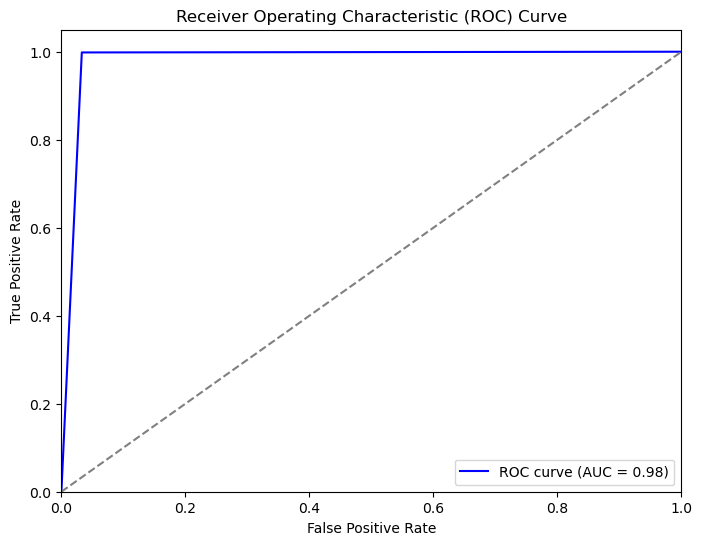

In [226]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2. Naive Bayes (MultinomialNB)

In [216]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [217]:
nb_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, nb_pred))

Accuracy: 0.9868311780756911


#### Classification Report

In [219]:
print("Classification Report:")
print(classification_report(y_test, nb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4163
           1       0.99      0.99      0.99      4266

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



### 3. Support Vector Machine (SVM)

In [193]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')  

svm.fit(X_train, y_train)

SVC(kernel='linear')

In [194]:
svm_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_pred))

Accuracy: 0.9906275952070234


#### Classification Report

In [220]:
print("Classification Report:")
print(classification_report(y_test, svm_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4163
           1       0.98      1.00      0.99      4266

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



### 4. Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [196]:
rf_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.9868311780756911


#### Classification Report

In [221]:
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4163
           1       0.98      0.99      0.99      4266

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



### 5. Gradient Boosting (XGBoost)

In [197]:
import xgboost as xgb

# Initialize and fit the model
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [198]:
xg_pred = xg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xg_pred))

Accuracy: 0.9768655831059437


#### Classification Report

In [222]:
print("Classification Report:")
print(classification_report(y_test, xg_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4163
           1       0.96      1.00      0.98      4266

    accuracy                           0.98      8429
   macro avg       0.98      0.98      0.98      8429
weighted avg       0.98      0.98      0.98      8429



### Compute the ROC curve and AUC score

In [227]:
model = {
    'lr' : [lr, lr_pred],
    'nb' : [nb, nb_pred],
    'rf' : [rf, rf_pred],
    'svm' : [svm, svm_pred],
    'xg' : [xg, xg_pred],
}

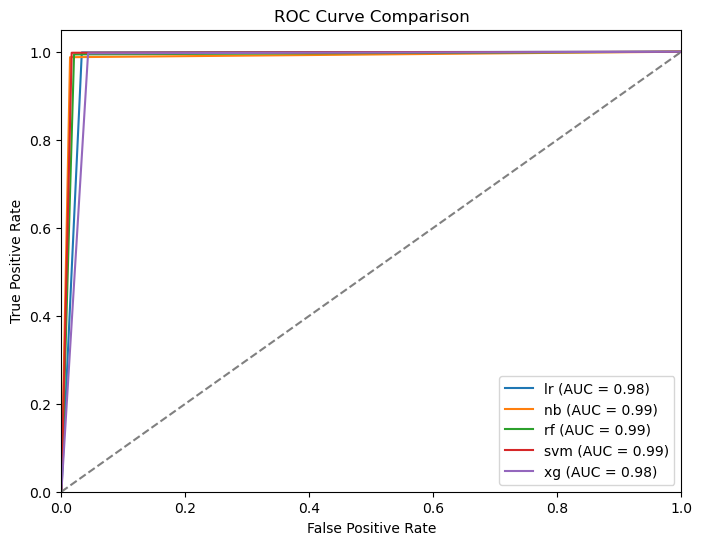

In [228]:
# Initialize the plot and the canvas
plt.figure(figsize=(8, 6))

# Loop through the models and plot their ROC curve
for name, (model_instance, y_pred) in model.items():
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve on canvas
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show the plot
plt.show()


### Save Naive Bayes Model

In [231]:
import joblib

joblib.dump(nb, 'email_spam_naive_bayes.pkl')

print("Model saved successfully!")

Model saved successfully!
